In [10]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import time

In [11]:
def Cnk(x, maxN):
    spin0 = (int)(maxN / 2 - x);
    spin1 = maxN - spin0;
    return math.factorial(spin0 + spin1) / (math.factorial(spin0) * math.factorial(spin1));

In [12]:
#Заменяет значения намагничености на индекс массива
def convertMToIndex(m, maxN):    
    return (int)(m + maxN / 2);

#Заменяет значения индекс на намагниченость
def convertIndexToM(index, maxN):    
    return (int)(index - maxN / 2);

def getM(configSpin):
    return (int)(0.5 * configSpin.sum());

def convertSpinToIndex(configSpin):
    convert2Binary = lambda x: "1" if x == 1 else "0";
    String = np.array2string(configSpin, formatter={'float_kind': convert2Binary}, separator='');
    String = String.replace('[','');
    String = String.replace(']','');
    return int(String, 2);

In [13]:
def generateSample(maxN):
    sample = np.zeros(maxN + 1);
    for i in range(maxN + 1):
        sample[i] = Cnk(convertIndexToM(i, maxN), maxN);
    return sample;

def generateField(maxN):
    field = np.zeros(maxN + 1);
    return field;

def getLeftRightM(configSpin, maxN, minM, maxM):
    newConfig = configSpin.copy();
    m = getM(configSpin);

    res = [];
    leftGet = False if m != minM else True;
    rightGet = False if m != maxM else True;

    while True:
        i = random.randint(0, maxN - 1);

        newConfig[i] *= -1;
        newM = getM(newConfig);

        if leftGet == False:
            if newM < m:
                res.append(newConfig.copy());
                leftGet = True;
                
        if rightGet == False:
            if newM > m:
                res.append(newConfig.copy());
                rightGet = True;

        if leftGet and rightGet:
            break;        

        newConfig[i] *= -1;

    
    return res;

In [14]:
def draw(sample, field):
    fig = plt.figure(figsize=(20,10));    
    fig.text(0.5, 0.1, 'M', ha='center', va='center');
    fig.text(0.1, 0.5, 'N', ha='center', va='center', rotation='vertical');

    ax_1 = fig.add_subplot(1, 2, 1);
    ax_2 = fig.add_subplot(1, 2, 2);
    ax_1.set_title("Sample");
    ax_2.set_title("Field");

    SampleSum = sample.sum();
    Sample = sample * (1 / SampleSum) * 100;

    FieldSum = field.sum();
    Field = field * (1 / FieldSum) * 100;
    
    X = np.array(range((int)(-Sample.size / 2), (int)(Sample.size / 2) + 1, 1));    

    ax_1.plot(X, Sample);
    ax_2.plot(X, Field);
    return;

def spinStatistics(configSpinCounter):
    uniqueSpinCount = 0;
    for i in range(configSpinCounter.size):
        count = configSpinCounter[i];
        if count != 0:
            uniqueSpinCount += 1;

    Text = "Unique Spin: " + str(uniqueSpinCount);
    print(Text);
    return;

def saveResult(sample, field, configSpinCounter):
    draw(sample, field);
    spinStatistics(configSpinCounter);
    return;

Unique Spin: 9693


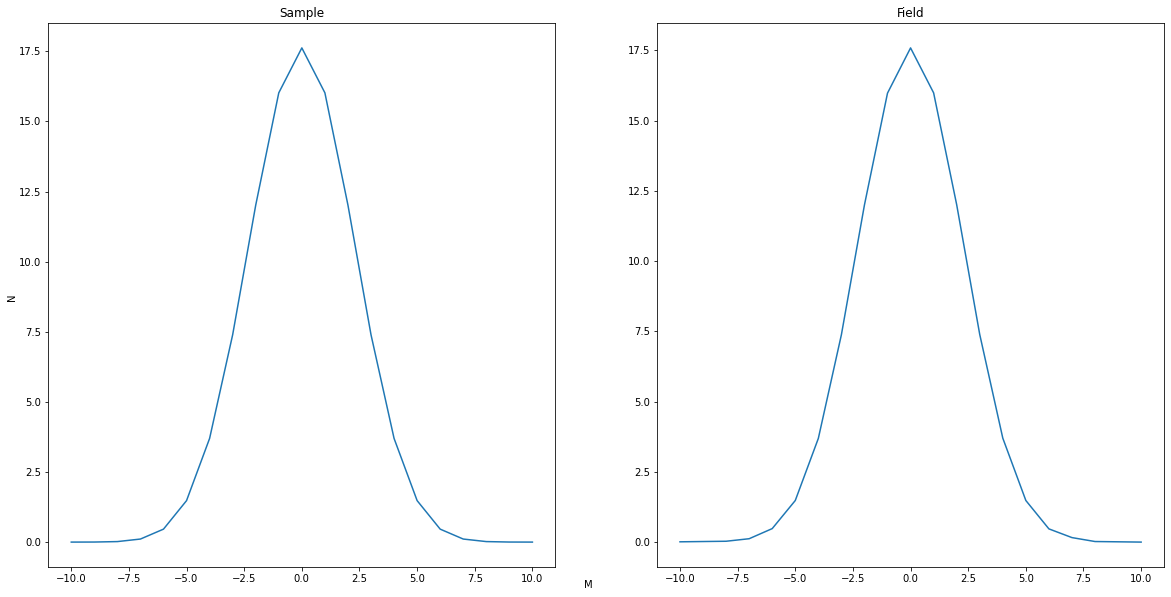

In [15]:
def Main():
    # Кол-во спинов
    maxN = 20;
    # Сколько раз итерируем
    step = int(1e4);

    configSpin = np.ones(maxN);
    spinIndex = random.randint(0, maxN - 1);
    configSpin[spinIndex] *= -1;

    # Семпл как и Филд есть словарь где ключ-значение представлены
    # как M намагниченость - ключ, а значение - сколько раз алгоритм
    # получал такую намагниченость 
    sample = generateSample(maxN);
    sampleSum = sample.sum();
    
    field =  generateField(maxN);
    fieldIndex = convertMToIndex(getM(configSpin), maxN);
    field[fieldIndex] += 1;
    fieldSum = field.sum();

    configSpinCounter = np.zeros(np.power(2, maxN));
    configSpinCounter[convertSpinToIndex(configSpin)] += 1;

    minM = getM(np.ones(maxN) * -1);
    maxM = getM(np.ones(maxN));  
     
    for i in range(step):
        m = getM(configSpin);
        states = getLeftRightM(configSpin, maxN, minM, maxM);
                
        newConfigSpin = configSpin.copy();
        currentH = float("inf");

        for state in states:                      
            fieldIndex = convertMToIndex(getM(state), maxN);

            H1 = sample[fieldIndex] - sampleSum / (fieldSum + 1) * (field[fieldIndex] + 1);
            if H1 < 0 :
                H1 = 0;

            H2 = sample[fieldIndex] - sampleSum / fieldSum * (field[fieldIndex]);
            if H2 < 0 :
                H2 = 0;

            H = H1 - H2;

            if H < currentH:
                currentH = H;
                newConfigSpin = state.copy();
            
        configSpin = newConfigSpin;
        fieldIndex = convertMToIndex(getM(configSpin), maxN);
        field[fieldIndex] += 1;
        fieldSum += 1;
        configSpinCounter[convertSpinToIndex(configSpin)] += 1;

        

    saveResult(sample, field, configSpinCounter);
    return;

Main();